#### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### Membaca file .json

In [2]:
df = pd.read_json("ecommerce.json")
df.head(10)

,transaction_id,transaction_date,customer_name,transaction_amount,item_category,item_name,payment_method,status
0,1,01-11-2023,John Doe,50.0,book,The Great Gatsby,credit card,success
1,2,01-11-2023,Jane Smith,120.5,gaming,PlayStation 5,cash,success
2,3,02-11-2023,Bob Johnson,800.0,technology,Laptop,credit card,failed
3,4,03-11-2023,Alice Williams,30.0,kitchen,Coffee Maker,e wallet,success
4,5,03-11-2023,Charlie Brown,150.0,book,To Kill a Mockingbird,credit card,success
5,6,04-11-2023,David Wilson,450.0,gaming,Nintendo Switch,cash,success
6,7,04-11-2023,Emma Davis,200.0,technology,Smartphone,e wallet,success
7,8,05-11-2023,George Thompson,25.0,kitchen,Blender,credit card,failed
8,9,05-11-2023,Olivia Martin,350.0,book,1984,credit card,success
9,10,06-11-2023,Samuel Moore,100.0,gaming,Xbox Series X,cash,success


#### Line plot jumlah nilai dari transaksi per hari

In [3]:
# Mengubah kolom 'transaction_date' ke dalam format datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d-%m-%Y')
# Menambahkan kolom date_month untuk mengambil data tanggal dan bulan (tanpa tahun) untuk keperluan visualisasi
df['month_date'] = df['transaction_date'].dt.strftime('%m/%d')
df

,transaction_id,transaction_date,customer_name,transaction_amount,item_category,item_name,payment_method,status,month_date
0,1,2023-11-01,John Doe,50.0,book,The Great Gatsby,credit card,success,11/01
1,2,2023-11-01,Jane Smith,120.5,gaming,PlayStation 5,cash,success,11/01
2,3,2023-11-02,Bob Johnson,800.0,technology,Laptop,credit card,failed,11/02
3,4,2023-11-03,Alice Williams,30.0,kitchen,Coffee Maker,e wallet,success,11/03
4,5,2023-11-03,Charlie Brown,150.0,book,To Kill a Mockingbird,credit card,success,11/03
...,...,...,...,...,...,...,...,...,...
95,96,2023-12-21,Oliver Brown,15.0,kitchen,Peeler,credit card,success,12/21
96,97,2023-12-21,Chloe Wilson,75.5,book,The Road,credit card,success,12/21
97,98,2023-12-22,Ella Harris,30.0,gaming,Board Game: Monopoly,cash,success,12/22
98,99,2023-12-22,Liam Turner,180.0,technology,Bluetooth Earbuds,e wallet,success,12/22


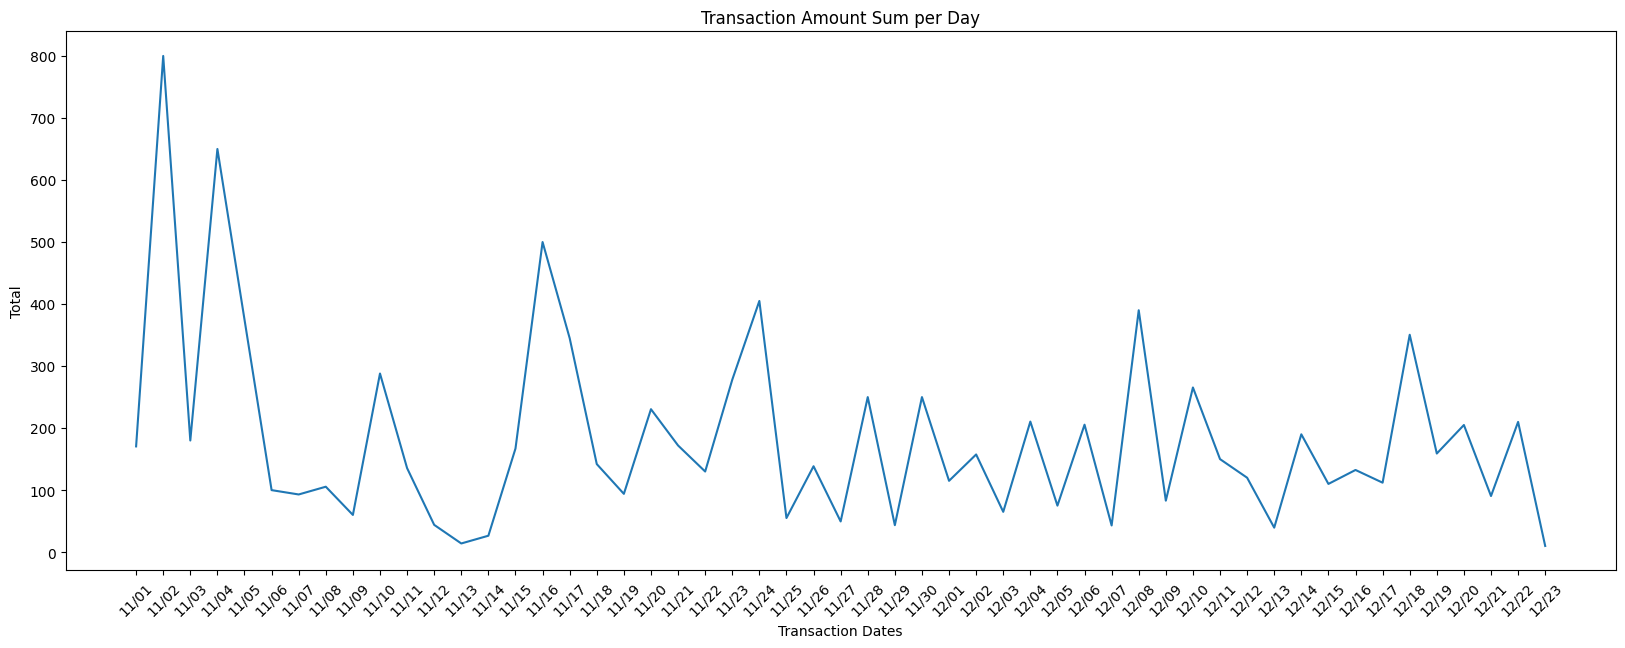

In [4]:
df.set_index("transaction_id")

sum_transaction_date = df.groupby(["month_date"]).sum(numeric_only=True)
transaction_dates = sum_transaction_date.index.get_level_values(0).tolist()
amount_sum = sum_transaction_date["transaction_amount"]

plt.figure(figsize=(20, 7))
plt.title("Transaction Amount Sum per Day")
plt.xlabel("Transaction Dates")
plt.ylabel("Total")
plt.plot(transaction_dates, amount_sum)
plt.xticks(rotation=45)
plt.show()

#### Pie chart kategori barang yang paling banyak dibeli

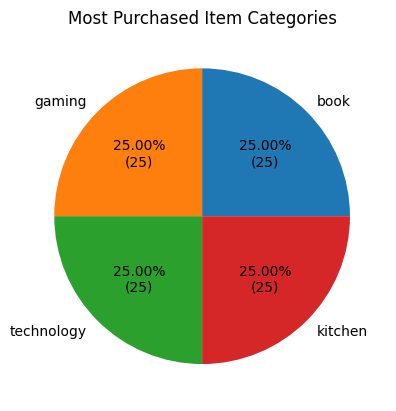

In [5]:
top_categories = df["item_category"].value_counts()
categories = top_categories.index.get_level_values(0).tolist()
frequencies = top_categories.values.tolist()

plt.title("Most Purchased Item Categories")
plt.pie(
   frequencies,
   labels=categories,
   autopct=lambda pct: f'{pct:.2f}%\n({math.ceil(pct/100.*sum(frequencies))})'
)
plt.show()

#### Pie chart perbandingan jumlah nilai transaksi berdasarkan metode pembayaran untuk mendapatkan nilai transaksi dengan e-wallet

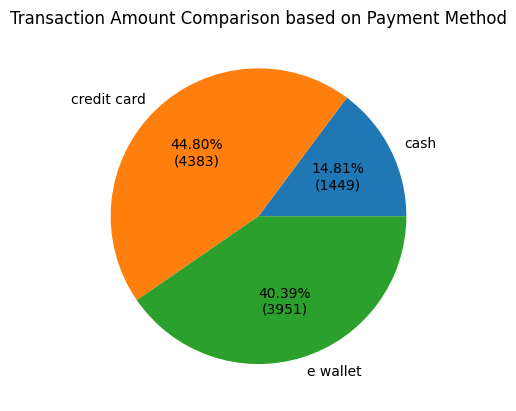

In [6]:
payment_method_sum = df.groupby(["payment_method"]).sum(numeric_only=True)
payment_method = payment_method_sum.index.get_level_values(0).tolist()
amount_sum = payment_method_sum["transaction_amount"]

plt.title("Transaction Amount Comparison based on Payment Method")
plt.pie(
   amount_sum,
   labels=payment_method,
   autopct=lambda pct: f'{pct:.2f}%\n({math.ceil(pct/100.*sum(amount_sum))})'
)
plt.show()

#### Box plot nilai maksimal, nilai minimal dan nilai tengah dari jumlah nilai transaksi yang dilakukan

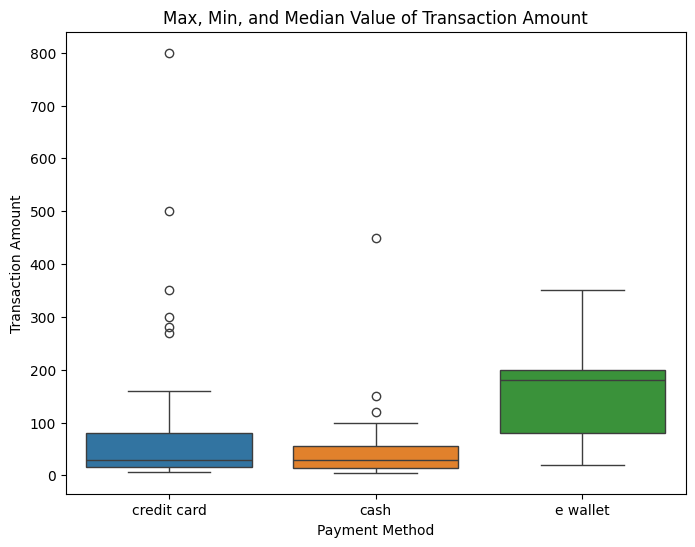

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='payment_method', y='transaction_amount', data=df, hue="payment_method")
plt.title("Max, Min, and Median Value of Transaction Amount")
plt.xlabel('Payment Method')
plt.ylabel('Transaction Amount')
plt.show()